## 1. Initialize Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Plot Configuration

In [2]:
sns.set_theme(context = "notebook",style="ticks", palette='bright')

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.autolayout"] = False
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 30
plt.rcParams["ytick.labelsize"] = 30
plt.rcParams["font.size"] = 30
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 10
plt.rcParams["legend.fontsize"] = 30
plt.rcParams['grid.color'] = "#949292"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
legend_properties = {'weight':'bold'}
plt.rcParams['mathtext.fontset'] = 'cm'

lineStyle = ['s-','o-','^-.','d-','*--','s-']
color = ['blue','red','magenta','green','blue','green']
markerFace = ['white','white','magenta','white','blue','green']
markerEdge = ["blue","red","black","green","black","black"]

### 2.1. File path

In [3]:
file_paths = ['MSTA/models/t2023-09-13 09_04_46.998475', 'VDN/models/t2023-09-12 15_30_43.553643', 'CRADLE/models/t2023-09-12 15_26_44.451624']
labelList = ["MSTA", "VDN", "CRADLE"]

## 3. Plots of Avg. Rewards earned and Team Coverage.

/var/folders/h6/2bpy6_vs04d09qrlzp790bd00000gn/T/ipykernel_37531/3572835186.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


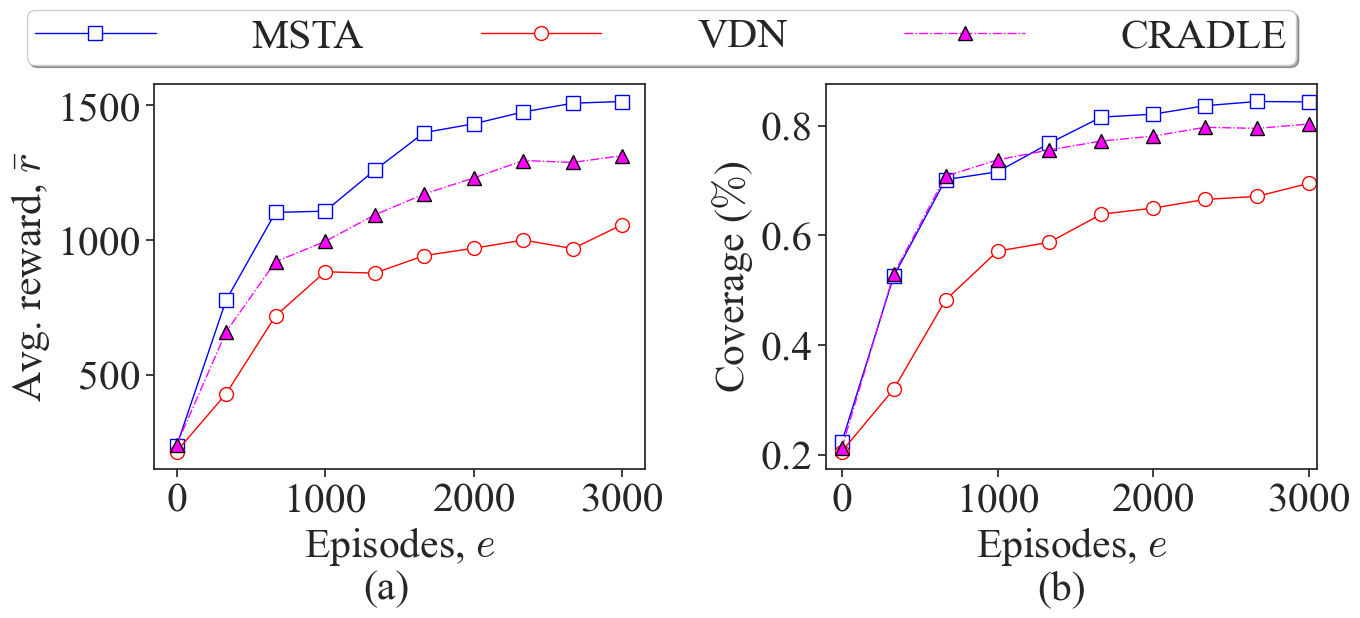

In [4]:
n = 300
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'hspace': 0.2, 'wspace': 0.37})

for idx, file_path in enumerate(file_paths):
    reward_history = np.loadtxt(file_path + "/reward_history.csv", delimiter=",", dtype=np.float32)
    x_axis = np.linspace(0, len(reward_history), int(len(reward_history)/n), dtype= np.int32)
    x_axis2 = np.linspace(0, len(reward_history), int(len(reward_history)/n+1), dtype= np.int32)
    y_axis = []
    for i in range(len(x_axis2)-1):
        y_axis.append(np.mean(reward_history[x_axis2[i]:x_axis2[(i+1)]]))

    ax[0].plot(x_axis, y_axis, lineStyle[idx], color=color[idx], 
    markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[0].set_xlabel("Episodes, $e$")
ax[0].set_ylabel(r"Avg. reward, $\bar{r}$")
ax[0].locator_params(axis='x', nbins=5)

for idx, file_path in enumerate(file_paths):
    coverage_history = np.loadtxt(file_path + "/coverage_history.csv", delimiter=",", dtype=np.float32)
    x_axis = np.linspace(0, len(coverage_history), int(len(coverage_history)/n), dtype= np.int32)
    x_axis2 = np.linspace(0, len(coverage_history), int(len(coverage_history)/n+1), dtype= np.int32)
    y_axis = []
    y_axis_max = []

    for i in range(len(x_axis2)-1):
        y_axis.append(np.mean(coverage_history[x_axis2[i]:x_axis2[(i+1)]]))
    ax[1].plot(x_axis, y_axis, lineStyle[idx], color=color[idx], 
    markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[1].set_xlabel("Episodes, $e$")
ax[1].set_ylabel("Coverage ($\%$)")
ax[1].set_xlim(-100,3050)
ax[1].locator_params(axis='x', nbins=5)

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc ='upper right', bbox_to_anchor=(0.9, 1.07), #0.25,-1,
         ncol=4, fancybox=True, shadow=True,
          borderpad=0.2,labelspacing=2.9, handlelength=2.9,columnspacing=2.8,handletextpad=2.3)

fig.text(0.28, -0.13, '(a)', ha='center', va='center', fontsize=30)
fig.text(0.73, -0.13, '(b)', ha='center', va='center', fontsize=30)

fig.tight_layout()
# plt.savefig("results_graph_1.svg")
plt.show()

## 4. Plots of Avg. Training Loss and Avg. Convergence.

/var/folders/h6/2bpy6_vs04d09qrlzp790bd00000gn/T/ipykernel_37531/1489271718.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


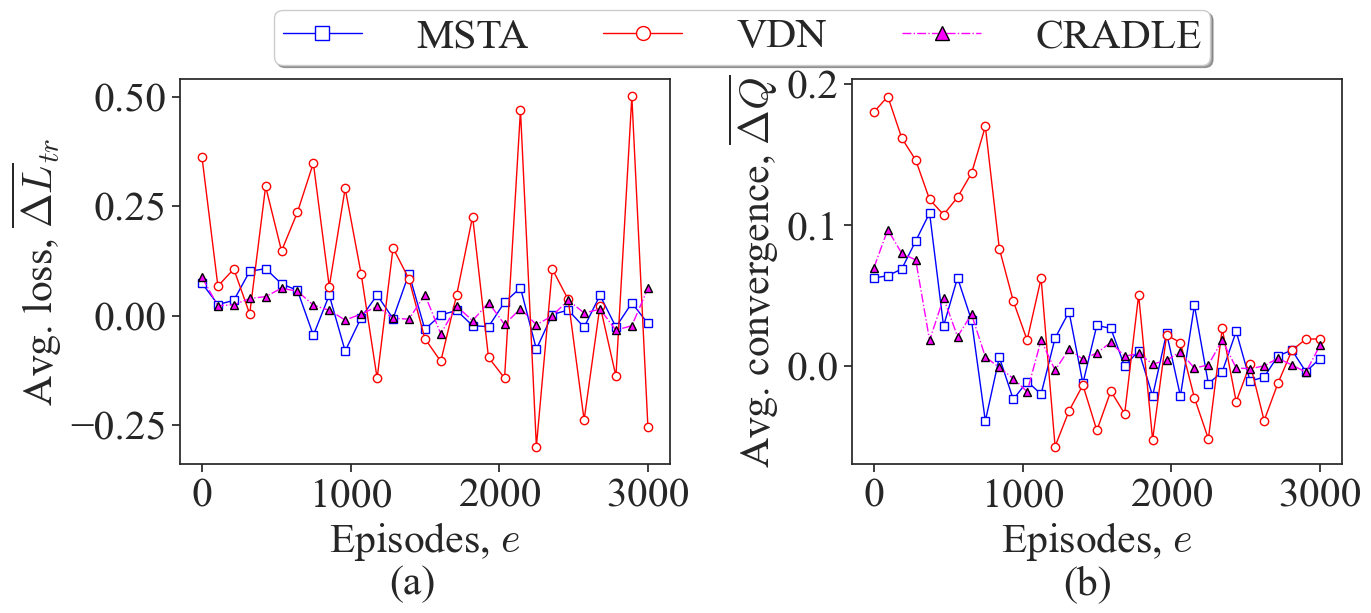

In [9]:
plt.rcParams["lines.markersize"] = 6

n = 100
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'hspace': 0.2, 'wspace': 0.37})

for idx, file_path in enumerate(file_paths):
    loss_history = np.loadtxt(file_path + "/loss_history.csv", delimiter=",", dtype=np.float32)
    delta_loss_history = []
    for i in range(1,len(loss_history)):
        delta_loss_history.append(loss_history[i] - loss_history[i-1])
    x_axis = np.linspace(0, len(delta_loss_history), int(len(delta_loss_history)/n), dtype= np.int32)
    x_axis2 = np.linspace(0, len(delta_loss_history), int(len(delta_loss_history)/n+1), dtype= np.int32)
    y_axis = []
    for i in range(len(x_axis2)-1):
        y_axis.append(np.mean(delta_loss_history[x_axis2[i]:x_axis2[(i+1)]]))

    ax[0].plot(x_axis, y_axis, lineStyle[idx], color=color[idx], 
    markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[0].set_xlabel("Episodes, $e$")
ax[0].set_ylabel("Avg. loss, $\overline{\Delta L}_{tr}$")
ax[0].locator_params(axis='x', nbins=5)


n = 90
for idx, file_path in enumerate(file_paths):
    if labelList[idx] == "MSTA":
        q_history = np.loadtxt(file_path + "/q_tr_history.csv", delimiter=",", dtype=np.float32)
    else:    
        q_history = np.loadtxt(file_path + "/q_tot_history.csv", delimiter=",", dtype=np.float32)
    delta_q_history = []
    for i in range(1,len(q_history)):
        delta_q_history.append(q_history[i] - q_history[i-1])
    x_axis = np.linspace(0, len(delta_q_history), int(len(delta_q_history)/n), dtype= np.int32)
    x_axis2 = np.linspace(0, len(delta_q_history), int(len(delta_q_history)/n+1), dtype= np.int32)
    y_axis = []
    y_axis_max = []

    for i in range(len(x_axis2)-1):
        y_axis.append(np.mean(delta_q_history[x_axis2[i]:x_axis2[(i+1)]]))

    ax[1].plot(x_axis, y_axis, lineStyle[idx], color=color[idx], 
    markerfacecolor=markerFace[idx], markeredgecolor=markerEdge[idx],label= labelList[idx])

ax[1].set_xlabel("Episodes, $e$")
ax[1].set_ylabel("Avg. convergence, $\overline{\Delta Q}$")
ax[1].locator_params(axis='x', nbins=5)

fig.legend(handles, labels, loc ='upper center', bbox_to_anchor=(0.5, 1.06), #0.25,-1,
         ncol=3, fancybox=True, shadow=True,
          borderpad=0.2,labelspacing=1.9, handlelength=1.9,columnspacing=1.8,handletextpad=1.3)
          
fig.text(0.28, -0.13, '(a)', ha='center', va='center', fontsize=30)
fig.text(0.73, -0.13, '(b)', ha='center', va='center', fontsize=30)

fig.tight_layout()
# plt.savefig("result_graph_2.svg")
plt.show()